In [1]:
import os
import glob
import numpy as np
import cv2
import matplotlib.image as mpimg       
import matplotlib.pyplot as plt        
import matplotlib.patches as mpatches
from scipy.signal import argrelextrema
from skimage import measure  
import PIL
import scipy.ndimage as ndi
from scipy.signal import argrelextrema
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from skimage.filters import gabor
%matplotlib inline

In [2]:
img = mpimg.imread('test.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gs, (25,25),0)
thrsh_ot,img_thre = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(img_thre, cv2.MORPH_CLOSE, kernel)
        
#Shape features
image, contours, _ = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
        

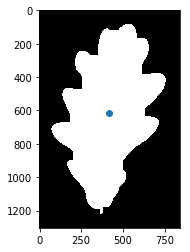

In [3]:
cy, cx = ndi.center_of_mass(image)

plt.imshow(image,cmap = 'gray')  
plt.scatter(cx, cy)           
plt.show()

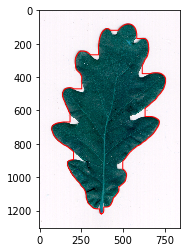

In [4]:
contours = measure.find_contours(image, .8)
contour = max(contours, key=len)
        
plt.plot(contour[::,1], contour[::,0], linewidth=1, c='r') 
plt.imshow(img)
plt.show()
#print( contours[0])


In [5]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return [rho, phi]

polar_contour = np.array([cart2pol(x, y) for x, y in contour])

In [6]:
#shift to centre
contour[::,1] -= cx  
contour[::,0] -= cy

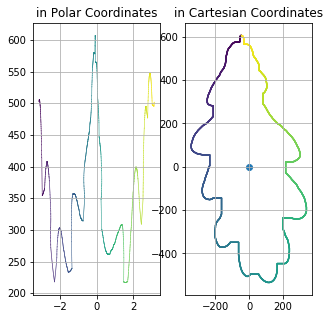

In [7]:
polar_contour = np.array([cart2pol(x, y) for x, y in contour])
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.scatter(polar_contour[::,1], polar_contour[::,0], linewidth=0, s=.5, c=polar_contour[::,1])
plt.title('in Polar Coordinates')
plt.grid()
plt.subplot(122)
plt.scatter(contour[::,1], contour[::,0], linewidth=0, s=2, c=range(len(contour)))     
plt.scatter(0, 0)
plt.title('in Cartesian Coordinates')
plt.grid()
plt.show()

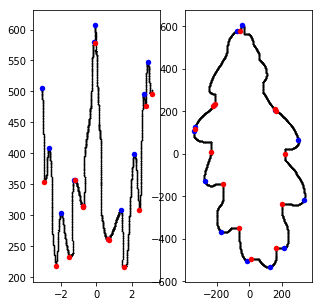

In [8]:
# for local maxima
c_max_index = argrelextrema(polar_contour[::,0], np.greater, order = 10)
# for local minima
c_min_index = argrelextrema(polar_contour[::,0], np.less, order = 10)
plt.figure(figsize=(5,5))
plt.subplot(121)
plt.scatter(polar_contour[::,1], polar_contour[::,0], linewidth=0, s=2, c='k')
plt.scatter(polar_contour[::,1][c_max_index], polar_contour[::,0][c_max_index], linewidth =0, s=30, c='b')
plt.scatter(polar_contour[::,1][c_min_index], polar_contour[::,0][c_min_index], linewidth=0, s=30, c='r')
plt.subplot(122)
plt.scatter(contour[::,1], contour[::,0], linewidth=0, s=2, c='k')
plt.scatter(contour[::,1][c_max_index], contour[::,0][c_max_index],linewidth=0, s=30, c='b')
plt.scatter(contour[::,1][c_min_index], contour[::,0][c_min_index], linewidth=0, s=30, c='r')
plt.show()

In [9]:
total_max = len( c_max_index[0] )
total_min = len( c_min_index[0] )

In [36]:
c_max_index
scatter(contour[::,1][c_min_index[0]]

SyntaxError: unexpected EOF while parsing (<ipython-input-36-2a0c316fc112>, line 2)

In [11]:
print( total_max )
print( total_min )

13
13


In [12]:
pix = img.reshape((len(img)), len(img[0]), 3)
r,g,b = 0,0,0

#for i in range(0,int(len(img_a)/3)):
#    for j in range(0,len(img_a[0])):
#        r = r + pix[i][j][0]
#        g = g + pix[i][j][1]
#        b = b + pix[i][j][2]

#r = r/(int(len(img_a)/3)*len(img_a[0]))
#g = g/(int(len(img_a)/3)*len(img_a[0]))
#b = b/(int(len(img_a)/3)*len(img_a[0]))
r = np.mean(pix[:][:][0])
g = np.mean(pix[:][:][1])
b = np.mean(pix[:][:][2])
print( "{}   {}    {} ".format(r,g,b))

250.67656373713382   250.8420427553444    250.7375296912114 


In [13]:
r_d = np.std(pix[:][:][0])
g_d = np.std(pix[:][:][1])
b_d = np.std(pix[:][:][2])
print( "{}   {}    {} ".format(r_d,g_d,b_d))

2.9945022581466287   2.848092182726425    2.871694263583241 


In [14]:
M = cv2.moments(cnt)
print (M)

{'m00': 418230.0, 'm10': 174007324.8333333, 'm01': 257051828.3333333, 'm20': 80692787182.83333, 'm11': 102417502640.41666, 'm02': 186774529490.0, 'm30': 40546930661681.35, 'm21': 45653434103286.086, 'm12': 72124560357231.28, 'm03': 150965748426511.5, 'mu20': 8295902464.728043, 'mu11': -4530590494.462616, 'mu02': 28785761468.792877, 'mu30': 71040311965.92969, 'mu21': -171869234461.8828, 'mu12': -15035280329.265625, 'mu03': 786183300759.0938, 'nu20': 0.04742783207941379, 'nu11': -0.025901471974333942, 'nu02': 0.16456874547701472, 'nu30': 0.0006280105002420977, 'nu21': -0.0015193582477847003, 'nu12': -0.00013291487128309245, 'nu03': 0.00695001688940346}


In [15]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print( cnt[0] )

[[526  82]]


In [16]:
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
hull = cv2.convexHull(cnt)
k = cv2.isContourConvex(cnt)
print ( area )

418230.0


[[ 388 1230]
 [-157  901]
 [ 392  -10]
 [ 937  318]]


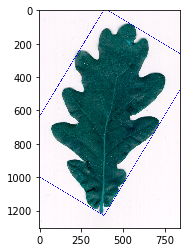

In [17]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
print ( box )
img_box = img.copy()
img_box = cv2.drawContours(img_box,[box],0,(0,0,255),2)
plt.figure()
plt.imshow(img_box)

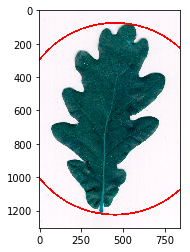

In [18]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img_cir = img.copy()
img_cir = cv2.circle(img_cir,center,radius,(255,0,0),10)
plt.figure()
plt.imshow(img_cir)
plt.show()

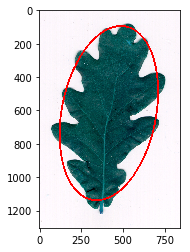

In [19]:
ellipse = cv2.fitEllipse(cnt)
img_elps = img.copy()
img_elps = cv2.ellipse(img_elps,ellipse,(255,0,0),10)
plt.figure()
plt.imshow(img_elps)

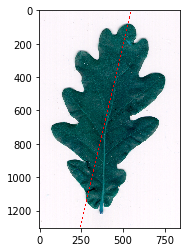

In [20]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img_line = img.copy()
img_line = cv2.line(img_line,(cols-1,righty),(0,lefty),(255,0,0),2)
plt.figure()
plt.imshow(img_line)

## Contour Properties

In [21]:
x,y,w,h = cv2.boundingRect(cnt)
aspect_ratio = float(w)/h

In [22]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area

In [23]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area

In [24]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)

In [25]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)

In [26]:
mask = np.zeros(gs.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)

In [27]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gs,mask = mask)

In [28]:
mean_val = cv2.mean(image,mask = mask)

In [29]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

# Finding LBP

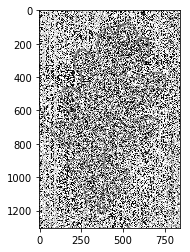

In [30]:
# Finding LBP
img_arr = np.array(gs)
feat_lbp = local_binary_pattern(img_arr,8,1,'uniform') #Radius = 1, No. of neighbours = 8
feat_lbp = np.uint8((feat_lbp/feat_lbp.max())*255) #Converting to unit8
lbp_img = PIL.Image.fromarray(feat_lbp) #Conversion from array to PIL image
plt.imshow(lbp_img,cmap='gray') #Displaying LBP

In [31]:
# Energy and Entropy of LBP feature
lbp_hist,_ = np.histogram(feat_lbp,8)
lbp_hist = np.array(lbp_hist,dtype=float)
lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
lbp_energy = np.sum(lbp_prob**2)
lbp_entropy = -np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))
print('LBP energy = '+str(lbp_energy))
print('LBP entropy = '+str(lbp_entropy))

LBP energy = 0.22992320138434041
LBP entropy = 2.52931081394304


## Co-occurance matrix

In [32]:
# Finding GLCM features from co-occurance matrix
gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True, normed=True) # Co-occurance matrix
contrast = greycoprops(gCoMat, prop='contrast')
dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
homogeneity = greycoprops(gCoMat, prop='homogeneity')
energy = greycoprops(gCoMat, prop='energy')
correlation = greycoprops(gCoMat, prop='correlation')
print('Contrast = '+str(contrast[0][0]))
print('Dissimilarity = '+str(dissimilarity[0][0]))
print('Homogeneity = '+str(homogeneity[0][0]))
print('Energy = '+str(energy[0][0]))
print('Correlation = '+str(correlation[0][0]))

Contrast = 96.30257358311424
Dissimilarity = 4.321088044113351
Homogeneity = 0.36604874801588816
Energy = 0.09860217800104723
Correlation = 0.9944549329824602


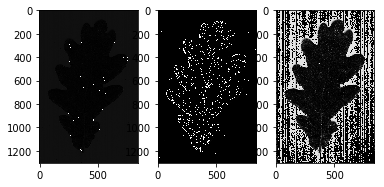

In [33]:
# Gabor filter
gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
# Displaying the filter response
fig, ax = plt.subplots(1,3)    
ax[0].imshow(gaborFilt_real,cmap='gray')
ax[1].imshow(gaborFilt_imag,cmap='gray')
ax[2].imshow(gaborFilt,cmap='gray')

In [34]:
# Energy and Entropy of Gabor filter response
gabor_hist,_ = np.histogram(gaborFilt,8)
gabor_hist = np.array(gabor_hist,dtype=float)
gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
gabor_energy = np.sum(gabor_prob**2)
gabor_entropy = -np.sum(np.multiply(gabor_prob,np.log2(gabor_prob)))
print('Gabor energy = '+str(gabor_energy))
print('Gabor entropy = '+str(gabor_entropy))

Gabor energy = 0.5349661878959845
Gabor entropy = 1.2471425161187504
